In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [3]:
Com_df=pd.read_csv('/content/drive/MyDrive/Asignments_DS/Company_Data.csv')
Com_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
Com_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
#Changing the categorical variables into dummies.
df1 = pd.get_dummies(Com_df)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [7]:

#Converting the Target variable i.e. Sales into Categorical
df1['Category'] = pd.cut(df1['Sales'], 
                        bins=[0,10, np.inf], 
                        labels=['Low/Mid','High'],
                        include_lowest=True)

In [8]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Category
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Low/Mid
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Low/Mid
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low/Mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,High
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,Low/Mid
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,Low/Mid
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,Low/Mid


In [9]:
x1 = df1.iloc[:,1:15]
y1 = df1.iloc[:,15]

In [10]:
print(x1,y1)

     CompPrice  Income  Advertising  ...  Urban_Yes  US_No  US_Yes
0          138      73           11  ...          1      0       1
1          111      48           16  ...          1      0       1
2          113      35           10  ...          1      0       1
3          117     100            4  ...          1      0       1
4          141      64            3  ...          1      1       0
..         ...     ...          ...  ...        ...    ...     ...
395        138     108           17  ...          1      0       1
396        139      23            3  ...          0      0       1
397        162      26           12  ...          1      0       1
398        100      79            7  ...          1      0       1
399        134      37            0  ...          1      0       1

[400 rows x 14 columns] 0      Low/Mid
1         High
2         High
3      Low/Mid
4      Low/Mid
        ...   
395       High
396    Low/Mid
397    Low/Mid
398    Low/Mid
399    Low/Mid
Name: 

In [11]:

# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x1,y1, test_size=0.25,random_state=40)

IT-1, Depth=2

In [12]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model1.fit(x_train,y_train)
preds1 = model1.predict(x_test) # predicting on test data set 

print('Model leaves:',model1.get_n_leaves(),'\n','\n',
      pd.Series(preds1).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds1==y_test))

Model leaves: 4 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.82


It-2,Depth=3

In [13]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test) # predicting on test data set 

print('Model leaves:',model2.get_n_leaves(),'\n','\n',
      pd.Series(preds2).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds2==y_test))

Model leaves: 7 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.76


IT-3, Depth=4

In [14]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model3.fit(x_train,y_train)
preds3 = model3.predict(x_test) # predicting on test data set 

print('Model leaves:',model3.get_n_leaves(),'\n','\n',
      pd.Series(preds3).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds3==y_test))

Model leaves: 12 
 
 Low/Mid    81
High       19
dtype: int64 
 
 Model Accuracy is: 0.8


IT 4-Depth=6

In [24]:
model5 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model5.fit(x_train,y_train)
preds5 = model5.predict(x_test) # predicting on test data set 

print('Model leaves:',model5.get_n_leaves(),'\n','\n',
      pd.Series(preds5).value_counts(),'\n','\n',
      'Model Accuracy is:',np.mean(preds5==y_test))

Model leaves: 24 
 
 Low/Mid    82
High       18
dtype: int64 
 
 Model Accuracy is: 0.83


#We can see, the MAximum accuracy is obtained in IT 4 with MAx Depth=6

In [26]:
print(classification_report(preds5,y_test))

              precision    recall  f1-score   support

        High       0.53      0.56      0.54        18
     Low/Mid       0.90      0.89      0.90        82

    accuracy                           0.83       100
   macro avg       0.71      0.72      0.72       100
weighted avg       0.83      0.83      0.83       100



#Building Decision Tree Classifier (CART) using Gini Criteria

In [25]:

from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [27]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
#Prediction and computing the accuracy
predG=model_gini.predict(x_test)
print('Model Accuracy is:',np.mean(predG==y_test))

Model Accuracy is: 0.83


#Lets Visualise both the Decision Trees

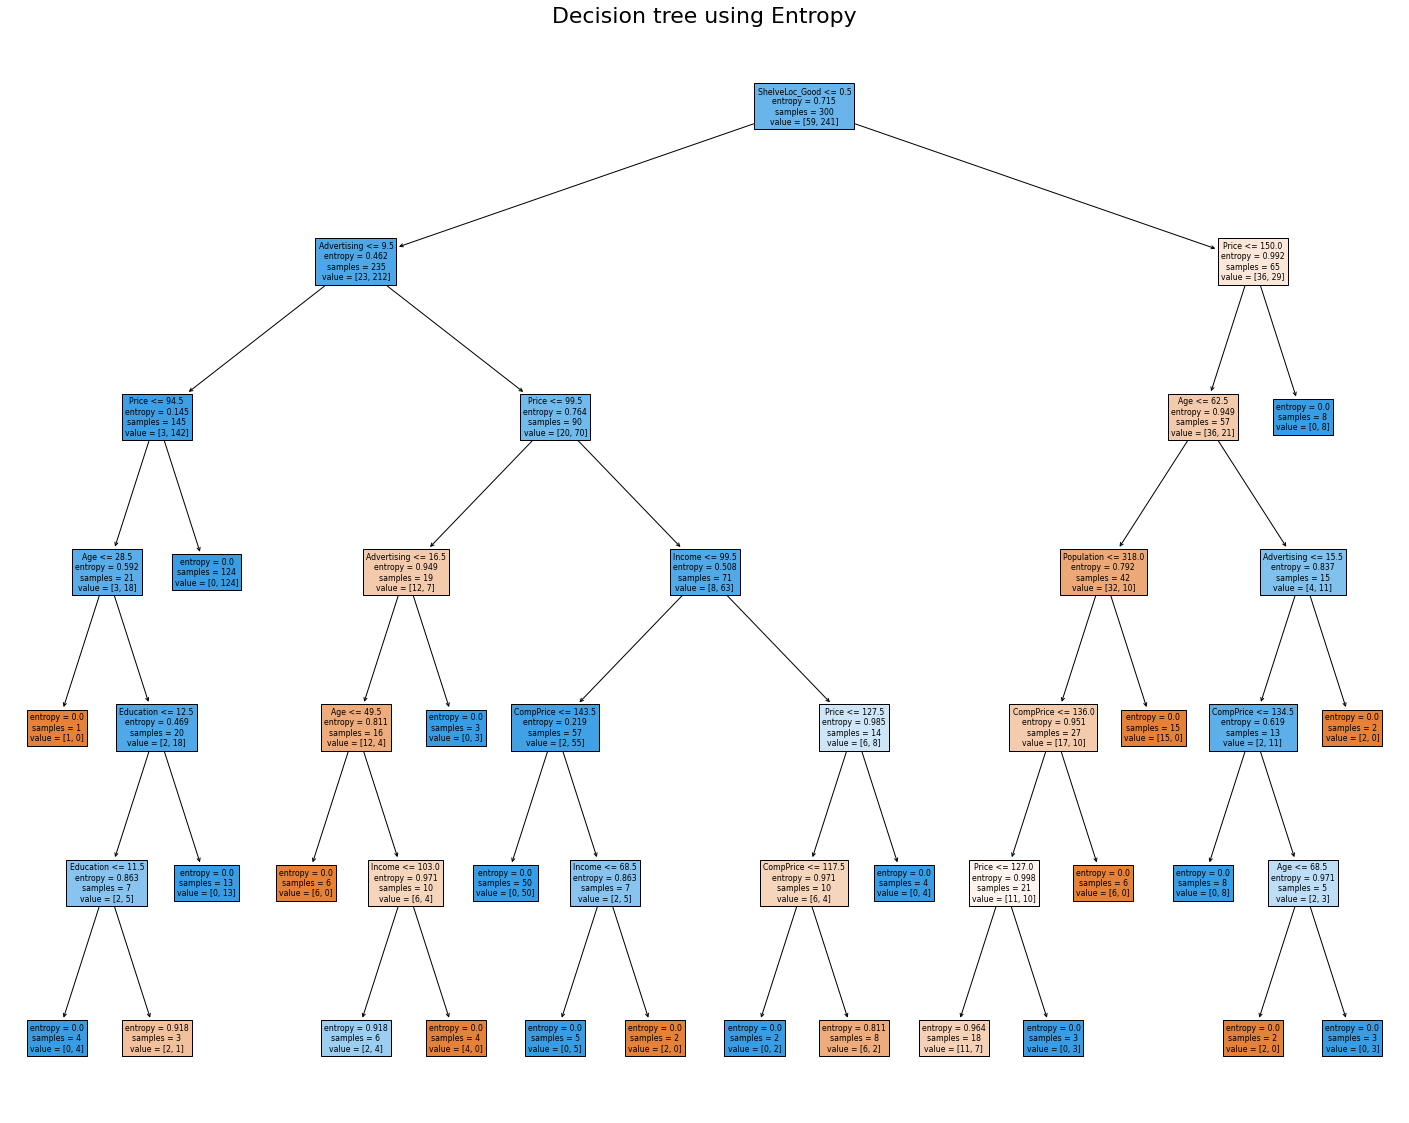

In [29]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model5,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)
plt.savefig('DT_Entropy.png')

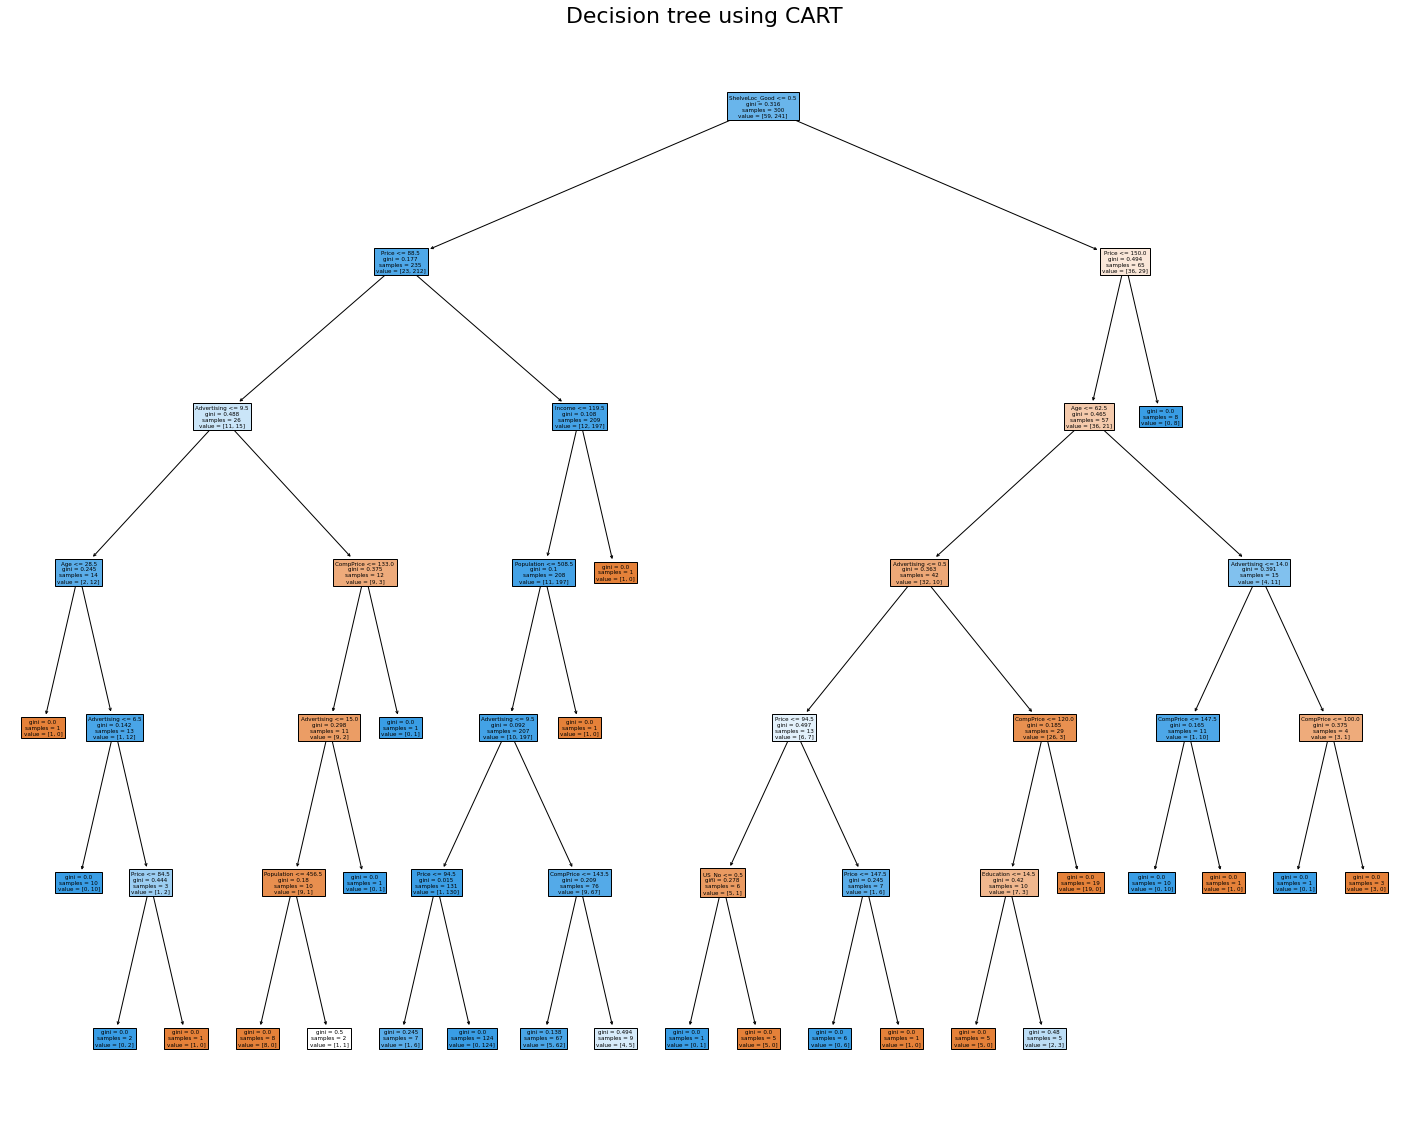

In [30]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,
                     feature_names= ['CompPrice','Income','Advertising','Population','Price','Age','Education',
                     'ShelveLoc_Bad','ShelveLoc_Good','ShelveLoc_Medium','Urban_No','Urban_Yes','US_No',
                     'US_Yes'], filled=True)
plt.title('Decision tree using CART',fontsize=22)
plt.savefig('DT_Cart.png')